<h1>Clustermarket Data Analysis</h1>

<h2>Dataset Cleanup</h2>

In [4]:
#Update File Path
clustermarket_file = 'Resources/Clustermarket Data 17OCT2023-27OCT2023.csv'
Lab_users_list = 'Resources/R&D Lab Users - R&D.csv'

In [5]:
#Import dependencies
import pandas as pd
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
from datetime import datetime as dt

In [6]:
#Reference file that we are analyzing
Clustermarket_Path = Path(clustermarket_file)
Clustermarket_RawData = pd.read_csv(Clustermarket_Path)

Clustermarket_RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 40 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Booking ID                                                            581 non-null    int64  
 1   Equipment ID                                                          581 non-null    int64  
 2   Equipment Name                                                        581 non-null    object 
 3   Room                                                                  581 non-null    object 
 4   Requester Organisation ID                                             581 non-null    int64  
 5   Requester Organisation Name                                           581 non-null    object 
 6   Requester Laboratory ID                                               581 non-null    int64  
 7  

In [7]:

#Defining a formula that elimates rows with declined bookings
def filter_rows_by_variable(df, col, values):
    return df[~df[col].isin([values])]

#Remove declined bookings
Clustermarket_RawData = filter_rows_by_variable(Clustermarket_RawData,"Status","declined")

Clustermarket_RawData.head()

,Booking ID,Equipment ID,Equipment Name,Room,Requester Organisation ID,Requester Organisation Name,Requester Laboratory ID,Requester Laboratory Name,Provider Organisation ID,Provider Organisation Name,...,Charging Type,Start Time,End Time,Duration (minutes),Actual Start Time,Actual End Time,Actual Duration (minutes),Requester Group Name,Notes,"Project Name, Project Supervisor, [...Funding Code, Funder, Amount];"
0,7961782,96116,Flexmap RD002-00229 (Left),Rigel (Unity),14049,Freenome,14324,R&D Lab,14049,Freenome,...,Per Hour,2023-10-16 09:30:00 -0700,2023-10-16 14:00:00 -0700,270,NaN,NaN,NaN,NaN,SciOps will be performing maintenance at this ...,NaN
1,7961783,96116,Flexmap RD002-00229 (Left),Rigel (Unity),14049,Freenome,14324,R&D Lab,14049,Freenome,...,Per Hour,2023-10-23 09:30:00 -0700,2023-10-23 14:00:00 -0700,270,NaN,NaN,NaN,NaN,SciOps will be performing maintenance at this ...,NaN
2,7961832,96147,Flexmap SO001-00193 (Aang),SciOps (Unity),14049,Freenome,14324,R&D Lab,14049,Freenome,...,Per Hour,2023-10-16 09:30:00 -0700,2023-10-16 14:00:00 -0700,270,NaN,NaN,NaN,NaN,SciOps will be performing maintenance at this ...,NaN
3,7961833,96147,Flexmap SO001-00193 (Aang),SciOps (Unity),14049,Freenome,14324,R&D Lab,14049,Freenome,...,Per Hour,2023-10-23 09:30:00 -0700,2023-10-23 14:00:00 -0700,270,NaN,NaN,NaN,NaN,SciOps will be performing maintenance at this ...,NaN
4,7961883,96148,Flexmap SO002-00192 (Katara),SciOps (Unity),14049,Freenome,14324,R&D Lab,14049,Freenome,...,Per Hour,2023-10-23 09:30:00 -0700,2023-10-23 14:00:00 -0700,270,NaN,NaN,NaN,NaN,SciOps will be performing maintenance at this ...,NaN


In [8]:
#Clean up Dataset
Clustermarket_Data = pd.DataFrame(Clustermarket_RawData,columns=[
    'Equipment ID',
    'Status',
    'Equipment Name',
    'Room',
    'Requester Name',
    'Booking Category',
    'Requested At',
    'Start Time',
    'Duration (minutes)',
    'Requester Group Name',
    'Notes'])

#Convert dataset to timeframe format
Clustermarket_Data["Requested At"]= pd.to_datetime(Clustermarket_Data["Requested At"], yearfirst=True, infer_datetime_format = True)
Clustermarket_Data["Requested At"]= Clustermarket_Data["Requested At"].dt.strftime('%Y/%m/%d')
Clustermarket_Data["Start Time"]= pd.to_datetime(Clustermarket_Data["Start Time"], yearfirst=True, infer_datetime_format = True)
Clustermarket_Data["Start Time"]= Clustermarket_Data["Start Time"].dt.strftime('%Y/%m/%d')

#Rename "Breakdown", "Repair" & "Other" as Unplanned
Clustermarket_Data['Booking Category'] = Clustermarket_Data['Booking Category'].replace(['Breakdown',
                                                                                         'Repair',
                                                                                         'Other'],
                                                                                        'Unplanned')

#Rename "Preventative Maintenance", "Cleaning" & "Calibration" as Periodic Maintenance
Clustermarket_Data['Booking Category'] = Clustermarket_Data['Booking Category'].replace(['Preventative Maintenance',
                                                                                         'Calibration',
                                                                                         'Cleaning'],
                                                                                        'Periodic Maintenance')



Clustermarket_Data.head(2)

,Equipment ID,Status,Equipment Name,Room,Requester Name,Booking Category,Requested At,Start Time,Duration (minutes),Requester Group Name,Notes
0,96116,completed,Flexmap RD002-00229 (Left),Rigel (Unity),Stefanie Kang,Periodic Maintenance,2023/03/21,2023/10/16,270,NaN,SciOps will be performing maintenance at this ...
1,96116,completed,Flexmap RD002-00229 (Left),Rigel (Unity),Stefanie Kang,Periodic Maintenance,2023/03/21,2023/10/23,270,NaN,SciOps will be performing maintenance at this ...


In [9]:
#Reference file that we are analyzing
Lab_users_Path = Path(Lab_users_list)
Lab_users_RawData = pd.read_csv(Lab_users_list)

#Clean up dataset to show only employees and department
del Lab_users_RawData['Email Address']
del Lab_users_RawData['Lab User']
del Lab_users_RawData['Lab']
del Lab_users_RawData['Manager']
del Lab_users_RawData['Director']
del Lab_users_RawData['Clustermarket Role']
del Lab_users_RawData['Lab Access']
del Lab_users_RawData['Emaint training']
del Lab_users_RawData['Emaint training completed']
del Lab_users_RawData['Comments']

#Using unique() create lists of all the teams in R&D
Teams = []

#Create a for loop allowing the Teams list to capture unique values in column
for x in Lab_users_RawData['Team'].unique():
    Teams.append(x)

#Filter out the database to show employees by their departments
Translational_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[0])]
nan_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[1])]
Development_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[2])]
PreAnalytics_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[3])]
Genomics_Research_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[4])]
SciOPs_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[5])]
Protein_Development_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[6])]
Protein_Research_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[7])]
Systems_Integration_df = Lab_users_RawData[(Lab_users_RawData['Team']==Teams[8])]

#Create a list of departments to store employee name
Translational = []
nan = []
Development = []
PreAnalytics = []
Genomics_Research = []
SciOps = []
Protein_Development = [] 
Protein_Research = []
Systems_Integration= [] 
Automation = []

for x in Translational_df['Employee']:
    Translational.append(x)

for x in nan_df['Employee']:
    nan.append(x)

for x in Development_df['Employee']:
    Development.append(x)

for x in PreAnalytics_df['Employee']:
    PreAnalytics.append(x)

for x in Genomics_Research_df['Employee']:
    Genomics_Research.append(x)

for x in SciOPs_df['Employee']:
    SciOps.append(x)

for x in Protein_Development_df['Employee']:
    Protein_Development.append(x)

for x in Protein_Research_df['Employee']:
    Protein_Research.append(x)

for x in Systems_Integration_df['Employee']:
    Systems_Integration.append(x)

#Adding names not listed in the R&D Lab User list
SciOps.extend(['Nicole Williams'])
add_automation = ()
Automation.extend(['Christine Shieh','Wendy Wong', 'Kevin Li','Bret Martin','Ryan Epperson'])
Genomics_Research.extend(['Phwe Phwe Hlaing'])
PreAnalytics.extend(['Danielle Volschenk'])


#Rename Requester with Department
Clustermarket_Data = Clustermarket_Data.rename(columns={"Requester Name":"Department"})

#Replace the Requester Name with DepartmentC
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(Translational,'Translational')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(nan,'nan')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(Development,'Development')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(PreAnalytics,'PreAnalytics')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(Genomics_Research,'Genomics Research')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(SciOps,'SciOps')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(Protein_Development,'Protein Development')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(Protein_Research,'Protein Research')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(Systems_Integration,'Systems Integration')
Clustermarket_Data['Department']=Clustermarket_Data['Department'].replace(Automation,'Automation')

#New Cleaned Dataset
Clustermarket_Data.head(2)

,Equipment ID,Status,Equipment Name,Room,Department,Booking Category,Requested At,Start Time,Duration (minutes),Requester Group Name,Notes
0,96116,completed,Flexmap RD002-00229 (Left),Rigel (Unity),SciOps,Periodic Maintenance,2023/03/21,2023/10/16,270,NaN,SciOps will be performing maintenance at this ...
1,96116,completed,Flexmap RD002-00229 (Left),Rigel (Unity),SciOps,Periodic Maintenance,2023/03/21,2023/10/23,270,NaN,SciOps will be performing maintenance at this ...


<h1>Room Data Analysis</h1>

In [10]:
#General Room Overview
Clustermarket_Room_Data = Clustermarket_Data.groupby(['Room','Equipment Name']).count()
del Clustermarket_Room_Data['Equipment ID']
del Clustermarket_Room_Data['Department']
del Clustermarket_Room_Data['Booking Category']
del Clustermarket_Room_Data['Requested At']
del Clustermarket_Room_Data['Start Time']
del Clustermarket_Room_Data['Notes']
del Clustermarket_Room_Data['Duration (minutes)']
del Clustermarket_Room_Data['Requester Group Name']
Clustermarket_Room_Data

Status
Room         Equipment Name                      
Alpha        Alpha Lab Bravo #1                11
             Alpha Lab Bravo #2                 7
             BioAnalyzer 1 Fred (left)          3
             BioRad Thermocycler 13             5
             BioRad Thermocycler 2              8
...                                           ...
Vega (Unity) Branson Water Bath Sonicator       4
             ThermoMixer 1                      2
             ThermoMixer 2                      2
             ThermoMixer 3                      2
             ThermoMixer 4                      1

[66 rows x 1 columns]

FileNotFoundError: [Errno 2] No such file or directory: 'Clustermarket/Outputs Rendered/01_Alpha_Equipment_Usage_Graph.png'

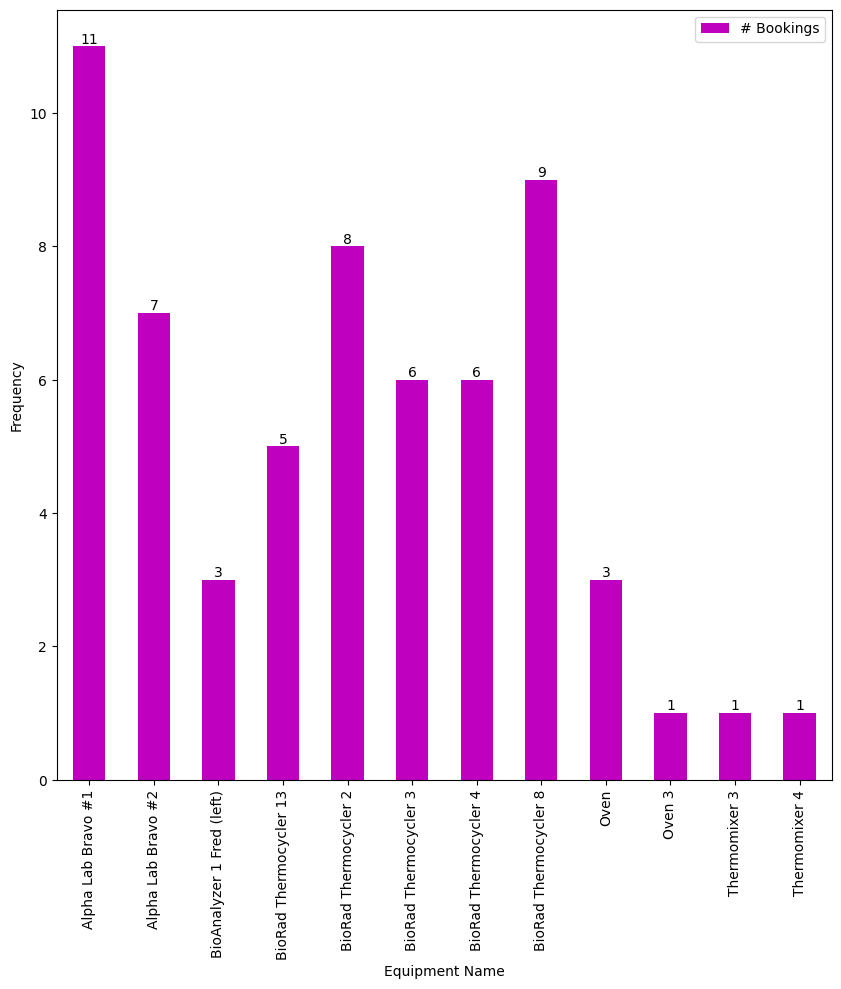

In [11]:
Clustermarket_Alpha = Clustermarket_Data[(Clustermarket_Data["Room"]=="Alpha")]
Clustermarket_Alpha_Equipment = Clustermarket_Alpha.groupby(['Equipment Name']).count().rename(columns={'Room':'# Bookings'})
del Clustermarket_Alpha_Equipment['Equipment ID']
del Clustermarket_Alpha_Equipment['Department']
del Clustermarket_Alpha_Equipment['Booking Category']
del Clustermarket_Alpha_Equipment['Requested At']
del Clustermarket_Alpha_Equipment['Start Time']
del Clustermarket_Alpha_Equipment['Notes']
del Clustermarket_Alpha_Equipment['Status']
del Clustermarket_Alpha_Equipment['Duration (minutes)']
del Clustermarket_Alpha_Equipment['Requester Group Name']

ax = Clustermarket_Alpha_Equipment.plot.bar(y="# Bookings",figsize=(10,10),color="m")
plt.ylabel('Frequency',fontsize=10)
plt.legend(loc='upper right')
ax.bar_label(ax.containers[0])
plt.savefig("Clustermarket/Outputs Rendered/01_Alpha_Equipment_Usage_Graph.png")
#Clustermarket_Alpha_Equipment

In [ ]:
#Clustermarket_Alpha_Equipment
#Clustermarket_Alpha_Zero = Clustermarket_Alpha_Equipment[(Clustermarket_Alpha_Equipment["# Bookings"]==0)]
plt.figure(facecolor="w")
sns.heatmap(Clustermarket_Alpha_Equipment,
            annot=True,
            cmap=ListedColormap(['white']),
            linecolor="black",
            linewidth=1,
            square=True,
            cbar=False)
plt.savefig("Clustermarket/Outputs Rendered/02_Alpha_Equipment_Usage_Table.png")

<h1>Equipment Status</h1>

In [ ]:
Clustermarket_Alpha_Status = Clustermarket_Alpha.groupby(['Equipment Name','Booking Category']).count()
del Clustermarket_Alpha_Status["Notes"]
del Clustermarket_Alpha_Status["Equipment ID"]
del Clustermarket_Alpha_Status["Department"]
del Clustermarket_Alpha_Status["Requested At"]
del Clustermarket_Alpha_Status["Start Time"]
del Clustermarket_Alpha_Status["Duration (minutes)"]
del Clustermarket_Alpha_Status["Room"]
del Clustermarket_Alpha_Status["Requester Group Name"]
Clustermarket_Alpha_Status.rename(columns={"Status":"Alpha"})
Clustermarket_Alpha_Status = Clustermarket_Alpha_Status.pivot_table(index="Equipment Name",columns="Booking Category")
Clustermarket_Alpha_Status = Clustermarket_Alpha_Status.fillna(0)
Clustermarket_Alpha_Status

In [ ]:
#Clustermarket_Alpha_Status.plot.bar(stacked=True)

ax = Clustermarket_Alpha_Status.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

ax.legend(["Periodic Maintenance","Use"],loc="upper left", ncol=2)
ax.set_xlabel("Booking Category")
ax.set_ylabel("Frequency")

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='center',fontsize=9)


ax.figure.savefig("Clustermarket/Outputs Rendered/03_Alpha_Equipment_Usage_Status.png")

<h1>Department & Equipment Usage</h1>

In [12]:
#Listing Equipment in Alpha Room
Alpha_equipment = ['Alpha Lab Bravo #1',
                   'Alpha Lab Bravo #2',
                   'BioAnalyzer 1 Fred (left)',
                   'BioRad Thermocycler 13',
                   'BioRad Thermocycler 2',
                   'BioRad Thermocycler 3',
                   'BioRad Thermocycler 4',
                   'BioRad Thermocycler 8',                   
                   'Oven',
                   'Oven 3',
                   'Thermomixer 3',
                   'Thermomixer 4',
                  ]

#Clustermarket_Alpha['Equipment Name'].unique()

In [13]:
#Grouping Equipment Name and Department
Clustermarket_Alpha_User = Clustermarket_Alpha.groupby(['Equipment Name','Department']).count()

#Delete unnecessary columns
del Clustermarket_Alpha_User["Notes"]
del Clustermarket_Alpha_User["Equipment ID"]
del Clustermarket_Alpha_User["Booking Category"]
del Clustermarket_Alpha_User["Requested At"]
del Clustermarket_Alpha_User["Start Time"]
del Clustermarket_Alpha_User["Duration (minutes)"]
del Clustermarket_Alpha_User["Room"]
del Clustermarket_Alpha_User["Requester Group Name"]

#Remove name from column
Clustermarket_Alpha_User = Clustermarket_Alpha_User.rename(columns={"Status":" "})

#Create a pivot table for plotting
Clustermarket_Alpha_User = Clustermarket_Alpha_User.pivot_table(index="Equipment Name",columns="Department")

#Fill in NaN values with zero
Clustermarket_Alpha_User = Clustermarket_Alpha_User.fillna(0)

Clustermarket_Alpha_User

\
Department                Automation Genomics Research Protein Research   
Equipment Name                                                            
Alpha Lab Bravo #1               1.0               9.0              0.0   
Alpha Lab Bravo #2               0.0               7.0              0.0   
BioAnalyzer 1 Fred (left)        0.0               1.0              0.0   
BioRad Thermocycler 13           0.0               2.0              3.0   
BioRad Thermocycler 2            0.0               8.0              0.0   
BioRad Thermocycler 3            0.0               0.0              0.0   
BioRad Thermocycler 4            0.0               3.0              3.0   
BioRad Thermocycler 8            0.0               6.0              3.0   
Oven                             0.0               0.0              0.0   
Oven 3                           0.0               0.0              0.0   
Thermomixer 3                    0.0               0.0              0.0   
Thermomixer 4                    0.0               0.0              0.0   

                                                
Department                SciOps Translational  
Equipment Name                                  
Alpha Lab Bravo #1           0.0           1.0  
Alpha Lab Bravo #2           0.0           0.0  
BioAnalyzer 1 Fred (left)    2.0           0.0  
BioRad Thermocycler 13       0.0           0.0  
BioRad Thermocycler 2        0.0           0.0  
BioRad Thermocycler 3        0.0           6.0  
BioRad Thermocycler 4        0.0           0.0  
BioRad Thermocycler 8        0.0           0.0  
Oven                         2.0           1.0  
Oven 3                       1.0           0.0  
Thermomixer 3                0.0           1.0  
Thermomixer 4                0.0           1.0

FileNotFoundError: [Errno 2] No such file or directory: 'Clustermarket/Outputs Rendered/05_Alpha_Equipment_Usage_Department.png'

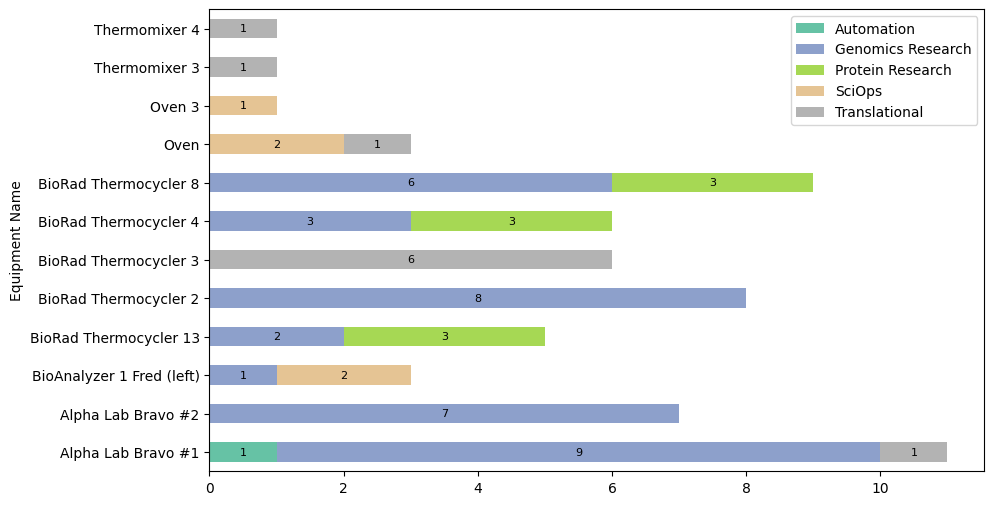

In [14]:
#Creating the plot
ax = Clustermarket_Alpha_User.plot(kind='barh', 
                    stacked=True, 
                    colormap='Set2', 
                    figsize=(10, 6))

#Editing the legend
ax.legend(["Automation",
           "Genomics Research",
            "Protein Research",
            "SciOps",
            "Translational"
           ])

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='center',fontsize=8)

ax.figure.savefig("Clustermarket/Outputs Rendered/05_Alpha_Equipment_Usage_Department.png")

<h1>Usage and Open Time Analysis</h1>

In [17]:
Clustermarket_Alpha_Time = pd.DataFrame(Clustermarket_Alpha,columns=[
    'Booking Category',
    'Equipment Name',
    'Duration (minutes)'
])

Clustermarket_Alpha_Time                                   

,Booking Category,Equipment Name,Duration (minutes)
205,Use,Alpha Lab Bravo #2,45
206,Use,BioRad Thermocycler 2,45
207,Use,Alpha Lab Bravo #2,480
208,Use,BioRad Thermocycler 2,240
209,Use,Alpha Lab Bravo #1,480
...,...,...,...
555,Use,BioRad Thermocycler 8,360
563,Use,Alpha Lab Bravo #1,420
564,Periodic Maintenance,BioAnalyzer 1 Fred (left),45
572,Use,Alpha Lab Bravo #2,45


In [18]:
#Take into account maintenance, unplanned Booking category
Clustermarket_Alpha_Time_Percent = Clustermarket_Alpha_Time.copy()

#Group by room and usage
Clustermarket_Alpha_Time_Percent = Clustermarket_Alpha_Time_Percent.groupby(['Booking Category','Equipment Name']).sum()

#Creating a column that converts the minutes into hours
Clustermarket_Alpha_Time_Percent['Duration (hrs)'] = round((Clustermarket_Alpha_Time_Percent['Duration (minutes)']/60),1)

#Find the earliest and latest date in order to find time range
Alpha_min_time = Clustermarket_Alpha['Start Time'].min()
Alpha_max_time = Clustermarket_Alpha['Start Time'].max()

#Change type to datetime
Alpha_min_time_dt = dt.strptime(Alpha_min_time,'%Y/%m/%d')
Alpha_max_time_dt = dt.strptime(Alpha_max_time,'%Y/%m/%d')

#Subtract the earliest and latest times to find weeks
#Convert from datetime to integer first
time_wks = ((Alpha_max_time_dt - Alpha_min_time_dt).days)/7

#Delete column
del Clustermarket_Alpha_Time_Percent['Duration (minutes)']

#Transform groupby into pivot table
Clustermarket_Alpha_Time_Percent = Clustermarket_Alpha_Time_Percent.pivot_table(index=['Booking Category'], columns='Equipment Name',fill_value=0)

#Create new row to calculate Open hrs
Clustermarket_Alpha_Time_Percent.loc[len(Clustermarket_Alpha_Time_Percent)] = round((8*5*time_wks)-(Clustermarket_Alpha_Time_Percent.iloc[0:len(Clustermarket_Alpha_Time_Percent)].sum(numeric_only=True)),1)

#Rename New Row
Clustermarket_Alpha_Time_Percent = Clustermarket_Alpha_Time_Percent.rename({Clustermarket_Alpha_Time_Percent.index[-1]: 'Open'})

#Change the negative values to zero
Clustermarket_Alpha_Time_Percent[Clustermarket_Alpha_Time_Percent<0] = 0

#Turn into percentages
Clustermarket_Alpha_Time_Percent.iloc[0:len(Clustermarket_Alpha_Time_Percent)] = round(100*(Clustermarket_Alpha_Time_Percent.iloc[0:len(Clustermarket_Alpha_Time_Percent)]/(Clustermarket_Alpha_Time_Percent.iloc[0:len(Clustermarket_Alpha_Time_Percent)].sum())),1)

#Sort columns by alphabetical order
Clustermarket_Alpha_Time_Percent = Clustermarket_Alpha_Time_Percent.sort_index(axis=1)

#Transpose for graphing
Clustermarket_Alpha_Time_Percent = Clustermarket_Alpha_Time_Percent.transpose()

Clustermarket_Alpha_Time_Percent

Booking Category                          Periodic Maintenance   Use  Open
               Equipment Name                                             
Duration (hrs) Alpha Lab Bravo #1                          0.0  91.9   8.1
               Alpha Lab Bravo #2                          0.0  64.9  35.1
               BioAnalyzer 1 Fred (left)                  26.7   2.9  70.4
               BioRad Thermocycler 13                      0.0  19.9  80.1
               BioRad Thermocycler 2                       0.0  65.5  34.5
               BioRad Thermocycler 3                       0.0  37.4  62.6
               BioRad Thermocycler 4                       0.0  29.4  70.6
               BioRad Thermocycler 8                       0.0  59.1  40.9
               Oven                                        0.0   9.5  90.5
               Oven 3                                      0.0   4.8  95.2
               Thermomixer 3                               0.0   4.8  95.2
               Thermomixer 4                               0.0   4.8  95.2

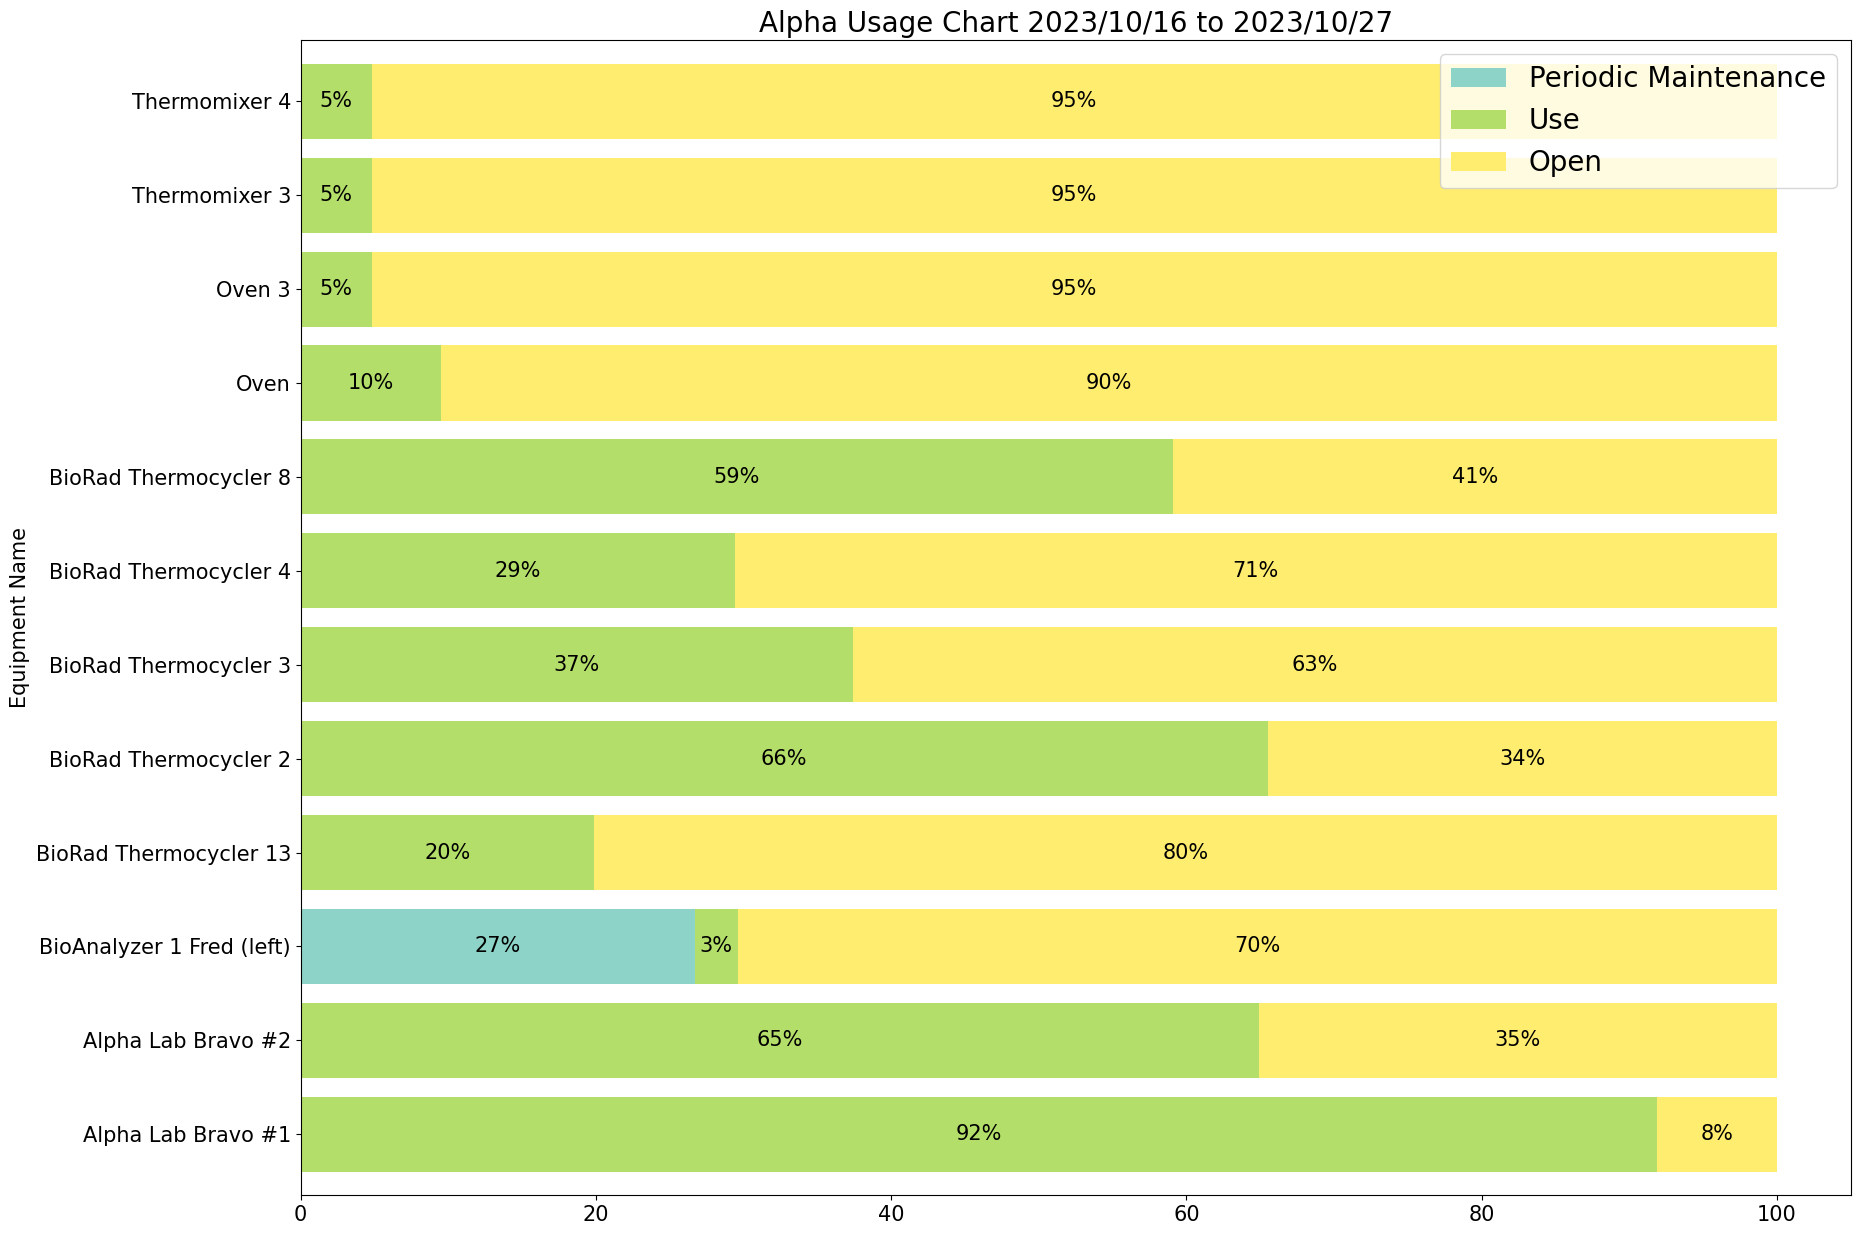

In [22]:
#Formatting table to integer
#Clustermarket_Alpha_Time_Percent = Clustermarket_Alpha_Time_Percent.style.format('{:,.0f}')

ax = Clustermarket_Alpha_Time_Percent.plot.barh(stacked = True,
                                figsize=(20,15),
                                width=0.8, 
                                colormap='Set3',
                                fontsize=15,
                                align='center')

#Labeling x y axis
ax.set_ylabel('Equipment Name',fontsize=15)
ax.set_xlabel('',fontsize=15)
plt.title(f"Alpha Usage Chart {Alpha_min_time} to {Alpha_max_time}",fontsize=20)

#Relabing y axis ticks
ax.set_yticklabels(Alpha_equipment)

#Renaming the Legend
ax.legend(fontsize=20)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='center',fontsize=15)

ax.figure.savefig('Outputs Rendered/Clustermarket_Usage_Open_Time')

<h1>Average Scheduling Time of Equipment Based on Room</h1>

In [23]:
Clustermarket_Booktime_Schedule = pd.DataFrame(Clustermarket_Data,columns=[
    'Department',
    'Room',
    'Requested At',
    'Start Time'])

#Convert dtype to Datetime
Clustermarket_Booktime_Schedule["Requested At"]= pd.to_datetime(Clustermarket_Booktime_Schedule["Requested At"], yearfirst=True, infer_datetime_format = True)
Clustermarket_Booktime_Schedule["Start Time"]= pd.to_datetime(Clustermarket_Booktime_Schedule["Start Time"], yearfirst=True, infer_datetime_format = True)

#Subtract and find dayes between Request and Booking
Clustermarket_Booktime_Schedule["Time Between Requested and Start Time"] = (Clustermarket_Booktime_Schedule["Start Time"]-Clustermarket_Booktime_Schedule["Requested At"]).dt.days

#Delete unnecessary columns
Clustermarket_Booktime_Schedule = Clustermarket_Booktime_Schedule.drop(['Requested At','Start Time'],axis=1)

#Change the negative values to zero
#Clustermarket_Booktime_Schedule.loc[Clustermarket_Booktime_Schedule["Time Between Requested and Start Time"]<0] = 0

Clustermarket_Booktime_Schedule

,Department,Room,Time Between Requested and Start Time
0,SciOps,Rigel (Unity),209
1,SciOps,Rigel (Unity),216
2,SciOps,SciOps (Unity),209
3,SciOps,SciOps (Unity),216
4,SciOps,SciOps (Unity),216
...,...,...,...
576,Automation,Rigel (Unity),1
577,Genomics Research,Alpha,0
578,SciOps,Castor (Unity),-1
579,Genomics Research,Chi,0


FileNotFoundError: [Errno 2] No such file or directory: 'Vallania/2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png'

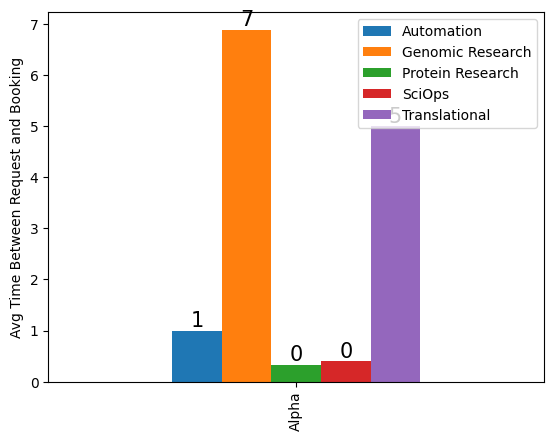

In [24]:
Rooms = ['Alpha', 'Rigel (Unity)','SciOps (Unity)', 'Sequencing', 'Beta', 'Phage','Vega (Unity)', 'Deneb (Unity)', 'Castor (Unity)', 'Chi']

Clustermarket_Booktime_Alpha = Clustermarket_Booktime_Schedule[(Clustermarket_Booktime_Schedule["Room"]==Rooms[0])]

Clustermarket_Booktime_Room_Alpha = Clustermarket_Booktime_Alpha.groupby(['Room','Department']).mean()

Clustermarket_Booktime_Room_Alpha = Clustermarket_Booktime_Room_Alpha.pivot_table(index=['Room'], columns='Department')

Clustermarket_Booktime_Room_Alpha = Clustermarket_Booktime_Room_Alpha.fillna(0)

ax = Clustermarket_Booktime_Room_Alpha.plot.bar()

#Labeling x y axis
ax.set_ylabel('Avg Time Between Request and Booking',fontsize=10)
ax.set_xlabel('',fontsize=15)
#plt.title(f"Alpha Usage Chart {Alpha_min_time} to {Alpha_max_time}",fontsize=20)

#Renaming y axis ticks
#ax.set_yticklabels(Proteomics_equipment)

#Renaming the Legend
ax.legend(['Automation','Genomic Research','Protein Research','SciOps','Translational'],fontsize=10,loc='upper right')

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='edge',fontsize=15)

ax.figure.savefig('Vallania/2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')

<h1>Analysis of Equipment Usage in Workflow</h1>

In [25]:
#List out the equipment utilized in each workflow
Genomics_equipment = [
                      'Beta Bravo #1 (Gelato) /ODTC',
                      'Beta Bravo #2 (Marshmallow) /ODTC',
                      'Beta Bravo #3 (Tres Leches, for SciOps use only)',
                      'Biotage (Left side)',
                      'Biotage (Right side)',
                      'NovaSeq (A)',
                      'NovaSeq (B)',
                      'SciOps Extraction STAR #1',
                      'SciOps Post-PCR STAR #1 (old Ham #3)',
                      'Sequencing Bravo #1 (Tiramisu) /ODTC',
                      'Sequencing Bravo #2 (Cannoli) /ODTC'
]

Proteomics_equipment = ['BlueWasher (Left #01865)',
                        'BlueWasher (Right #01863)',
                        'Certus Flex',
                        'Flexmap RD002-00229 (Left)',
                        'Flexmap SO001-00193 (Aang)',
                        'Flexmap SO002-00192 (Katara)',
                        'SciOps Protein STAR #1']


In [26]:
#Filter out the df by equipment listed
Clustermarket_Genomics = Clustermarket_Data[Clustermarket_Data["Equipment Name"].isin(Genomics_equipment)]
Clustermarket_Proteomics = Clustermarket_Data[Clustermarket_Data["Equipment Name"].isin(Proteomics_equipment)]

#Delete unnecessary columns
Clustermarket_Genomics = Clustermarket_Genomics.drop(['Room','Equipment ID','Status','Requester Group Name','Notes'],axis=1)
Clustermarket_Proteomics = Clustermarket_Proteomics.drop(['Room','Equipment ID','Status','Requester Group Name','Notes'],axis=1)

Clustermarket_Genomics.head()

,Equipment Name,Department,Booking Category,Requested At,Start Time,Duration (minutes)
16,Beta Bravo #1 (Gelato) /ODTC,SciOps,Periodic Maintenance,2023/04/10,2023/10/16,60
17,Beta Bravo #1 (Gelato) /ODTC,SciOps,Periodic Maintenance,2023/04/10,2023/10/23,60
18,Sequencing Bravo #1 (Tiramisu) /ODTC,SciOps,Periodic Maintenance,2023/04/10,2023/10/16,60
19,Sequencing Bravo #1 (Tiramisu) /ODTC,SciOps,Periodic Maintenance,2023/04/10,2023/10/23,60
20,Sequencing Bravo #2 (Cannoli) /ODTC,SciOps,Use,2023/04/10,2023/10/16,60


In [27]:
#Take into account maintenance, unplanned Booking category
Clustermarket_Genomics_Time= Clustermarket_Genomics.copy()

#Group by room and usage
Clustermarket_Genomics_Time= Clustermarket_Genomics_Time.groupby(['Booking Category','Equipment Name']).sum(numeric_only=True)

Clustermarket_Genomics_Time

Duration (minutes)
Booking Category     Equipment Name                                                      
Periodic Maintenance Beta Bravo #1 (Gelato) /ODTC                                     120
                     Beta Bravo #2 (Marshmallow) /ODTC                                120
                     Biotage (Left side)                                              405
                     Biotage (Right side)                                             405
                     SciOps Extraction STAR #1                                         30
                     SciOps Post-PCR STAR #1 (old Ham #3)                              90
                     Sequencing Bravo #1 (Tiramisu) /ODTC                             150
Unplanned            SciOps Extraction STAR #1                                        870
                     Sequencing Bravo #1 (Tiramisu) /ODTC                             720
Use                  Beta Bravo #1 (Gelato) /ODTC                                    2865
                     Beta Bravo #2 (Marshmallow) /ODTC                               3225
                     Beta Bravo #3 (Tres Leches, for SciOps use only)                 510
                     Biotage (Right side)                                             360
                     NovaSeq (A)                                                     7965
                     NovaSeq (B)                                                     5040
                     SciOps Extraction STAR #1                                       3390
                     SciOps Post-PCR STAR #1 (old Ham #3)                            1200
                     Sequencing Bravo #1 (Tiramisu) /ODTC                            1455
                     Sequencing Bravo #2 (Cannoli) /ODTC                             3195

In [28]:
#Creating a column that converts the minutes into hours
Clustermarket_Genomics_Time['Duration (hrs)'] = round((Clustermarket_Genomics_Time['Duration (minutes)']/60),1)

#Find the earliest and latest date in order to find time range
Genomics_min_time = Clustermarket_Genomics['Start Time'].min()
Genomics_max_time = Clustermarket_Genomics['Start Time'].max()

#Change type to datetime
Genomics_min_time_dt = dt.strptime(Genomics_min_time,'%Y/%m/%d')
Genomics_max_time_dt = dt.strptime(Genomics_max_time,'%Y/%m/%d')

#Subtract the earliest and latest times to find weeks
#Convert from datetime to integer first
time_wks_Genomics = ((Genomics_max_time_dt - Genomics_min_time_dt).days)/7

#Delete column
del Clustermarket_Genomics_Time['Duration (minutes)']

#Transform groupby into pivot table
Clustermarket_Genomics_Time= Clustermarket_Genomics_Time.pivot_table(index=['Booking Category'], columns='Equipment Name',fill_value=0)

#Create new row to calculate Open hrs
Clustermarket_Genomics_Time.loc[len(Clustermarket_Genomics_Time)] = round((8*5*time_wks_Genomics)-(Clustermarket_Genomics_Time.iloc[0:len(Clustermarket_Genomics_Time)].sum(numeric_only=True)),1)

#Rename New Row
Clustermarket_Genomics_Time= Clustermarket_Genomics_Time.rename({Clustermarket_Genomics_Time.index[-1]: 'Open'})

#Change the negative values to zero
Clustermarket_Genomics_Time[Clustermarket_Genomics_Time<0] = 0

#Turn into percentages
Clustermarket_Genomics_Time.iloc[0:len(Clustermarket_Genomics_Time)] = (round(100*(Clustermarket_Genomics_Time.iloc[0:len(Clustermarket_Genomics_Time)]/(Clustermarket_Genomics_Time.iloc[0:len(Clustermarket_Genomics_Time)].sum())),1)) 

#Sort columns by alphabetical order
Clustermarket_Genomics_Time = Clustermarket_Genomics_Time.sort_index(axis=1)

#Transpose for graphing
Clustermarket_Genomics_Time= Clustermarket_Genomics_Time.transpose()

Clustermarket_Genomics_Time

Booking Category                                                 Periodic Maintenance  \
               Equipment Name                                                           
Duration (hrs) Beta Bravo #1 (Gelato) /ODTC                                       3.2   
               Beta Bravo #2 (Marshmallow) /ODTC                                  3.2   
               Beta Bravo #3 (Tres Leches, for SciOps use only)                   0.0   
               Biotage (Left side)                                               10.8   
               Biotage (Right side)                                              10.8   
               NovaSeq (A)                                                        0.0   
               NovaSeq (B)                                                        0.0   
               SciOps Extraction STAR #1                                          0.7   
               SciOps Post-PCR STAR #1 (old Ham #3)                               2.4   
               Sequencing Bravo #1 (Tiramisu) /ODTC                               4.0   
               Sequencing Bravo #2 (Cannoli) /ODTC                                0.0   

Booking Category                                                 Unplanned  \
               Equipment Name                                                
Duration (hrs) Beta Bravo #1 (Gelato) /ODTC                            0.0   
               Beta Bravo #2 (Marshmallow) /ODTC                       0.0   
               Beta Bravo #3 (Tres Leches, for SciOps use only)        0.0   
               Biotage (Left side)                                     0.0   
               Biotage (Right side)                                    0.0   
               NovaSeq (A)                                             0.0   
               NovaSeq (B)                                             0.0   
               SciOps Extraction STAR #1                              20.3   
               SciOps Post-PCR STAR #1 (old Ham #3)                    0.0   
               Sequencing Bravo #1 (Tiramisu) /ODTC                   19.1   
               Sequencing Bravo #2 (Cannoli) /ODTC                     0.0   

Booking Category                                                   Use  Open  
               Equipment Name                                                 
Duration (hrs) Beta Bravo #1 (Gelato) /ODTC                       76.0  20.8  
               Beta Bravo #2 (Marshmallow) /ODTC                  85.5  11.3  
               Beta Bravo #3 (Tres Leches, for SciOps use only)   13.5  86.5  
               Biotage (Left side)                                 0.0  89.2  
               Biotage (Right side)                                9.5  79.7  
               NovaSeq (A)                                       100.0   0.0  
               NovaSeq (B)                                       100.0   0.0  
               SciOps Extraction STAR #1                          79.0   0.0  
               SciOps Post-PCR STAR #1 (old Ham #3)               31.8  65.8  
               Sequencing Bravo #1 (Tiramisu) /ODTC               38.5  38.5  
               Sequencing Bravo #2 (Cannoli) /ODTC                84.6  15.4

FileNotFoundError: [Errno 2] No such file or directory: 'Vallania/2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png'

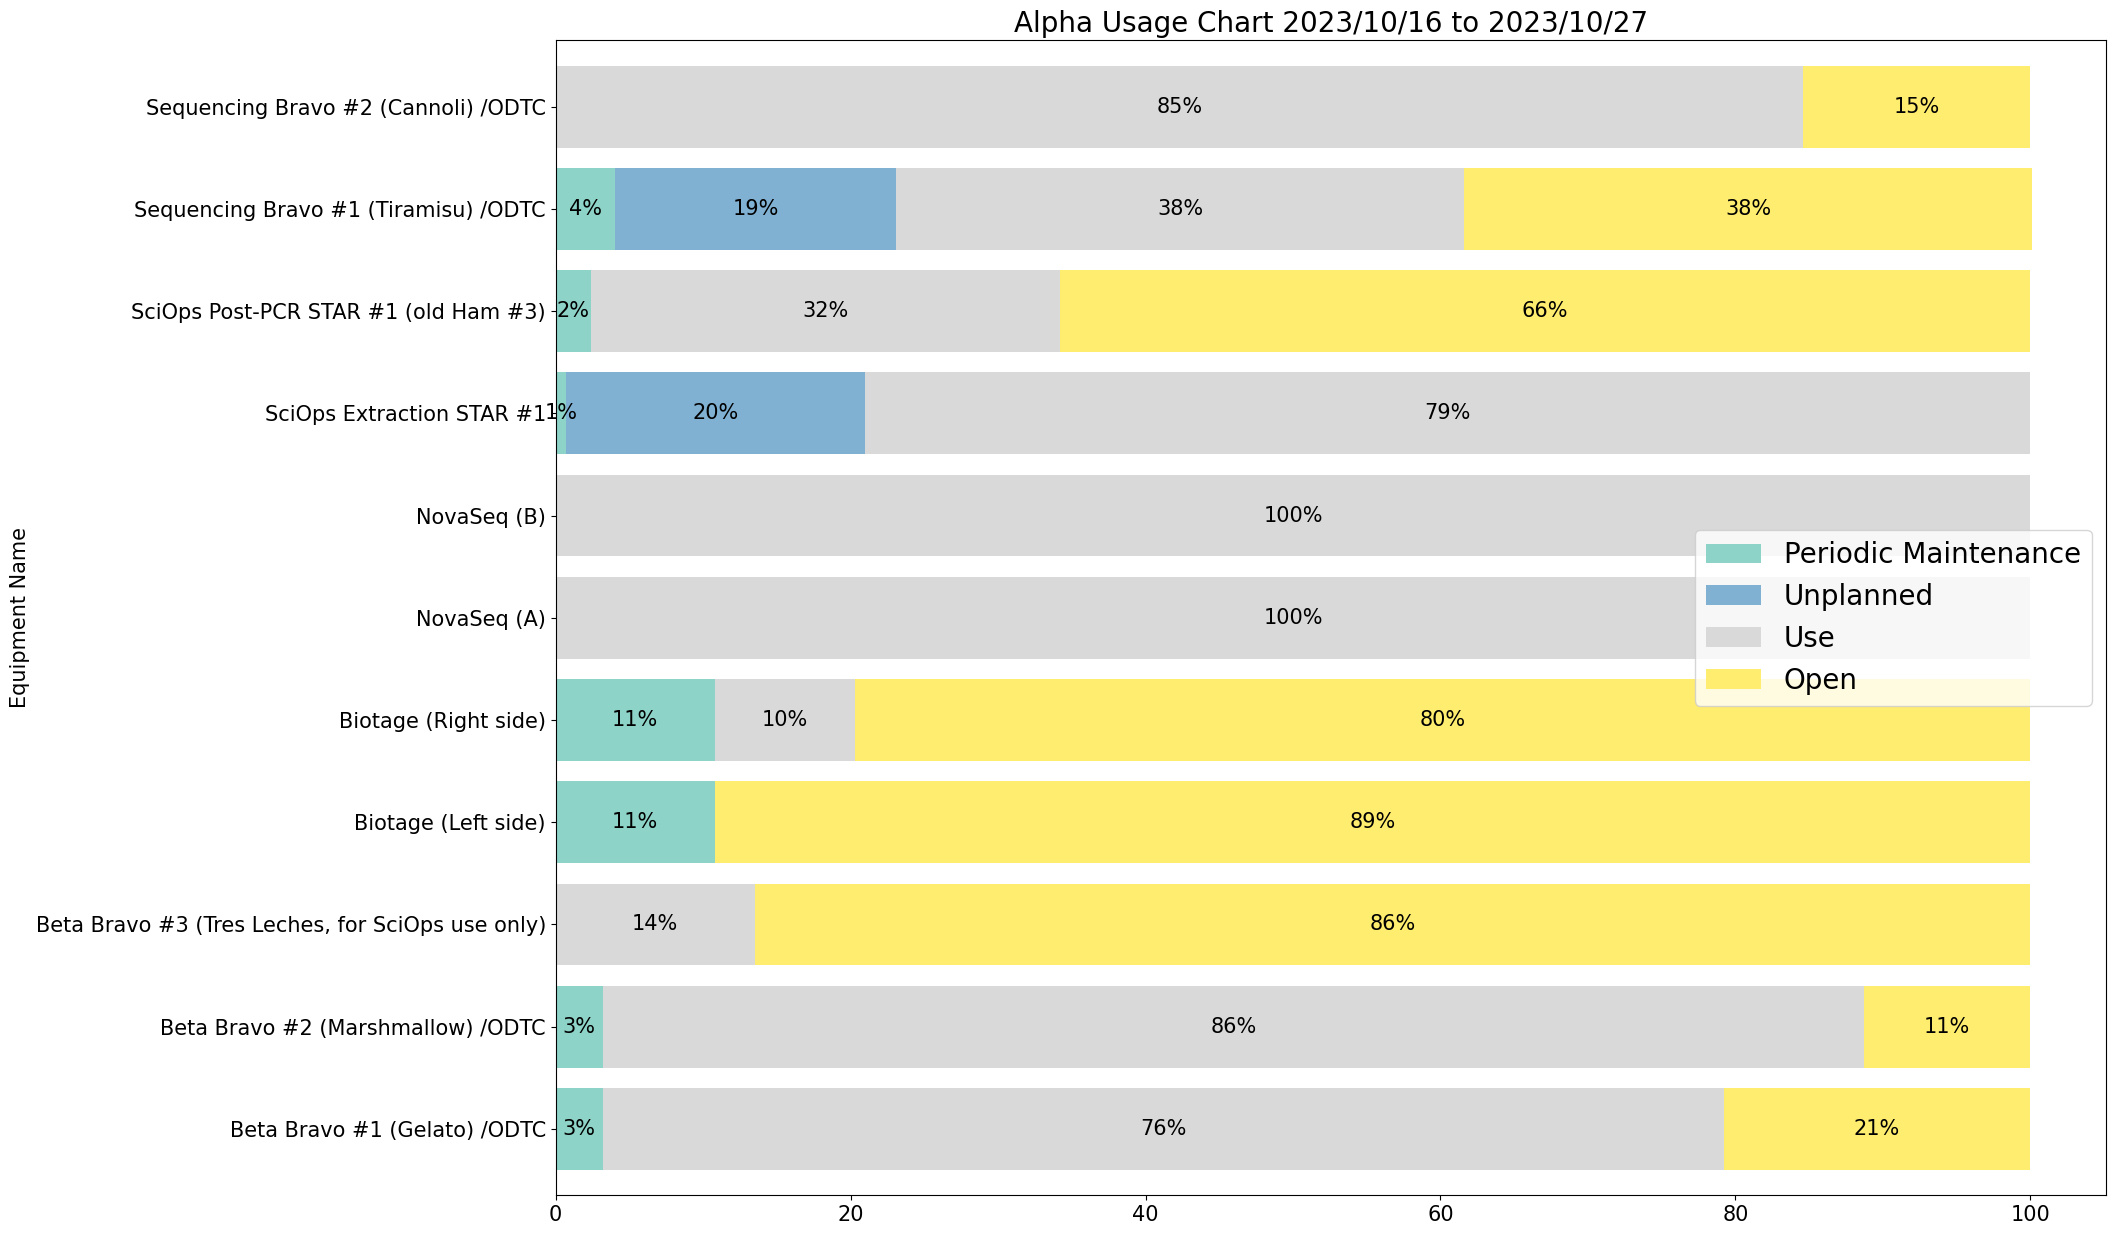

In [29]:

#Renaming y axis ticks
#Formatting table to integer
#Clustermarket_Alpha_Time_Percent = Clustermarket_Alpha_Time_Percent.style.format('{:,.0f}')

ax = Clustermarket_Genomics_Time.plot.barh(stacked = True,
                                figsize=(20,15),
                                width=0.8, 
                                colormap='Set3',
                                fontsize=15,
                                align='center')

#Labeling x y axis
ax.set_ylabel('Equipment Name',fontsize=15)
ax.set_xlabel('',fontsize=15)
plt.title(f"Alpha Usage Chart {Alpha_min_time} to {Alpha_max_time}",fontsize=20)

#Renaming y axis 
ax.set_yticklabels(Genomics_equipment)

#Renaming the Legend
ax.legend(fontsize=20,loc='center right')

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='center',fontsize=15)

ax.figure.savefig('Vallania/2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')

In [30]:
#Take into account maintenance, unplanned Booking category
Clustermarket_Proteomics_Time= Clustermarket_Proteomics.copy()

#Group by room and usage
Clustermarket_Proteomics_Time= Clustermarket_Proteomics_Time.groupby(['Booking Category','Equipment Name']).sum(numeric_only=True)


#Creating a column that converts the minutes into hours
Clustermarket_Proteomics_Time['Duration (hrs)'] = round((Clustermarket_Proteomics_Time['Duration (minutes)']/60),1)

#Find the earliest and latest date in order to find time range
Proteomics_min_time = Clustermarket_Proteomics['Start Time'].min()
Proteomics_max_time = Clustermarket_Proteomics['Start Time'].max()

#Change type to datetime
Proteomics_min_time_dt = dt.strptime(Proteomics_min_time,'%Y/%m/%d')
Proteomics_max_time_dt = dt.strptime(Proteomics_max_time,'%Y/%m/%d')

#Subtract the earliest and latest times to find weeks
#Convert from datetime to integer first
time_wks_Proteomics = ((Proteomics_max_time_dt - Proteomics_min_time_dt).days)/7

#Delete column
del Clustermarket_Proteomics_Time['Duration (minutes)']

#Transform groupby into pivot table
Clustermarket_Proteomics_Time= Clustermarket_Proteomics_Time.pivot_table(index=['Booking Category'], columns='Equipment Name',fill_value=0)

#Create new row to calculate Open hrs
Clustermarket_Proteomics_Time.loc[len(Clustermarket_Proteomics_Time)] = round((8*5*time_wks_Proteomics)-(Clustermarket_Proteomics_Time.iloc[0:len(Clustermarket_Proteomics_Time)].sum(numeric_only=True)),1)

#Rename New Row
Clustermarket_Proteomics_Time= Clustermarket_Proteomics_Time.rename({Clustermarket_Proteomics_Time.index[-1]: 'Open'})

#Change the negative values to zero
Clustermarket_Proteomics_Time[Clustermarket_Proteomics_Time<0] = 0

#Turn into percentages
Clustermarket_Proteomics_Time.iloc[0:len(Clustermarket_Proteomics_Time)] = (round(100*(Clustermarket_Proteomics_Time.iloc[0:len(Clustermarket_Proteomics_Time)]/(Clustermarket_Proteomics_Time.iloc[0:len(Clustermarket_Proteomics_Time)].sum())),1)) 

#Sort columns by alphabetical order
Clustermarket_Proteomics_Time = Clustermarket_Proteomics_Time.sort_index(axis=1)

#Transpose for graphing
Clustermarket_Proteomics_Time= Clustermarket_Proteomics_Time.transpose()

Clustermarket_Proteomics_Time

Booking Category                             Periodic Maintenance  Unplanned  \
               Equipment Name                                                  
Duration (hrs) BlueWasher (Left #01865)                       5.3        0.0   
               BlueWasher (Right #01863)                      3.4        0.0   
               Certus Flex                                    1.9        2.9   
               Flexmap RD002-00229 (Left)                    11.7        0.0   
               Flexmap SO001-00193 (Aang)                     2.3        0.0   
               Flexmap SO002-00192 (Katara)                   2.6       19.0   
               SciOps Protein STAR #1                         0.0        0.0   

Booking Category                              Use  Open  
               Equipment Name                            
Duration (hrs) BlueWasher (Left #01865)      10.2  84.5  
               BlueWasher (Right #01863)     10.2  86.4  
               Certus Flex                    9.2  85.9  
               Flexmap RD002-00229 (Left)    23.3  65.0  
               Flexmap SO001-00193 (Aang)    97.7   0.0  
               Flexmap SO002-00192 (Katara)  78.4   0.0  
               SciOps Protein STAR #1        15.5  84.5

FileNotFoundError: [Errno 2] No such file or directory: 'Vallania/2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png'

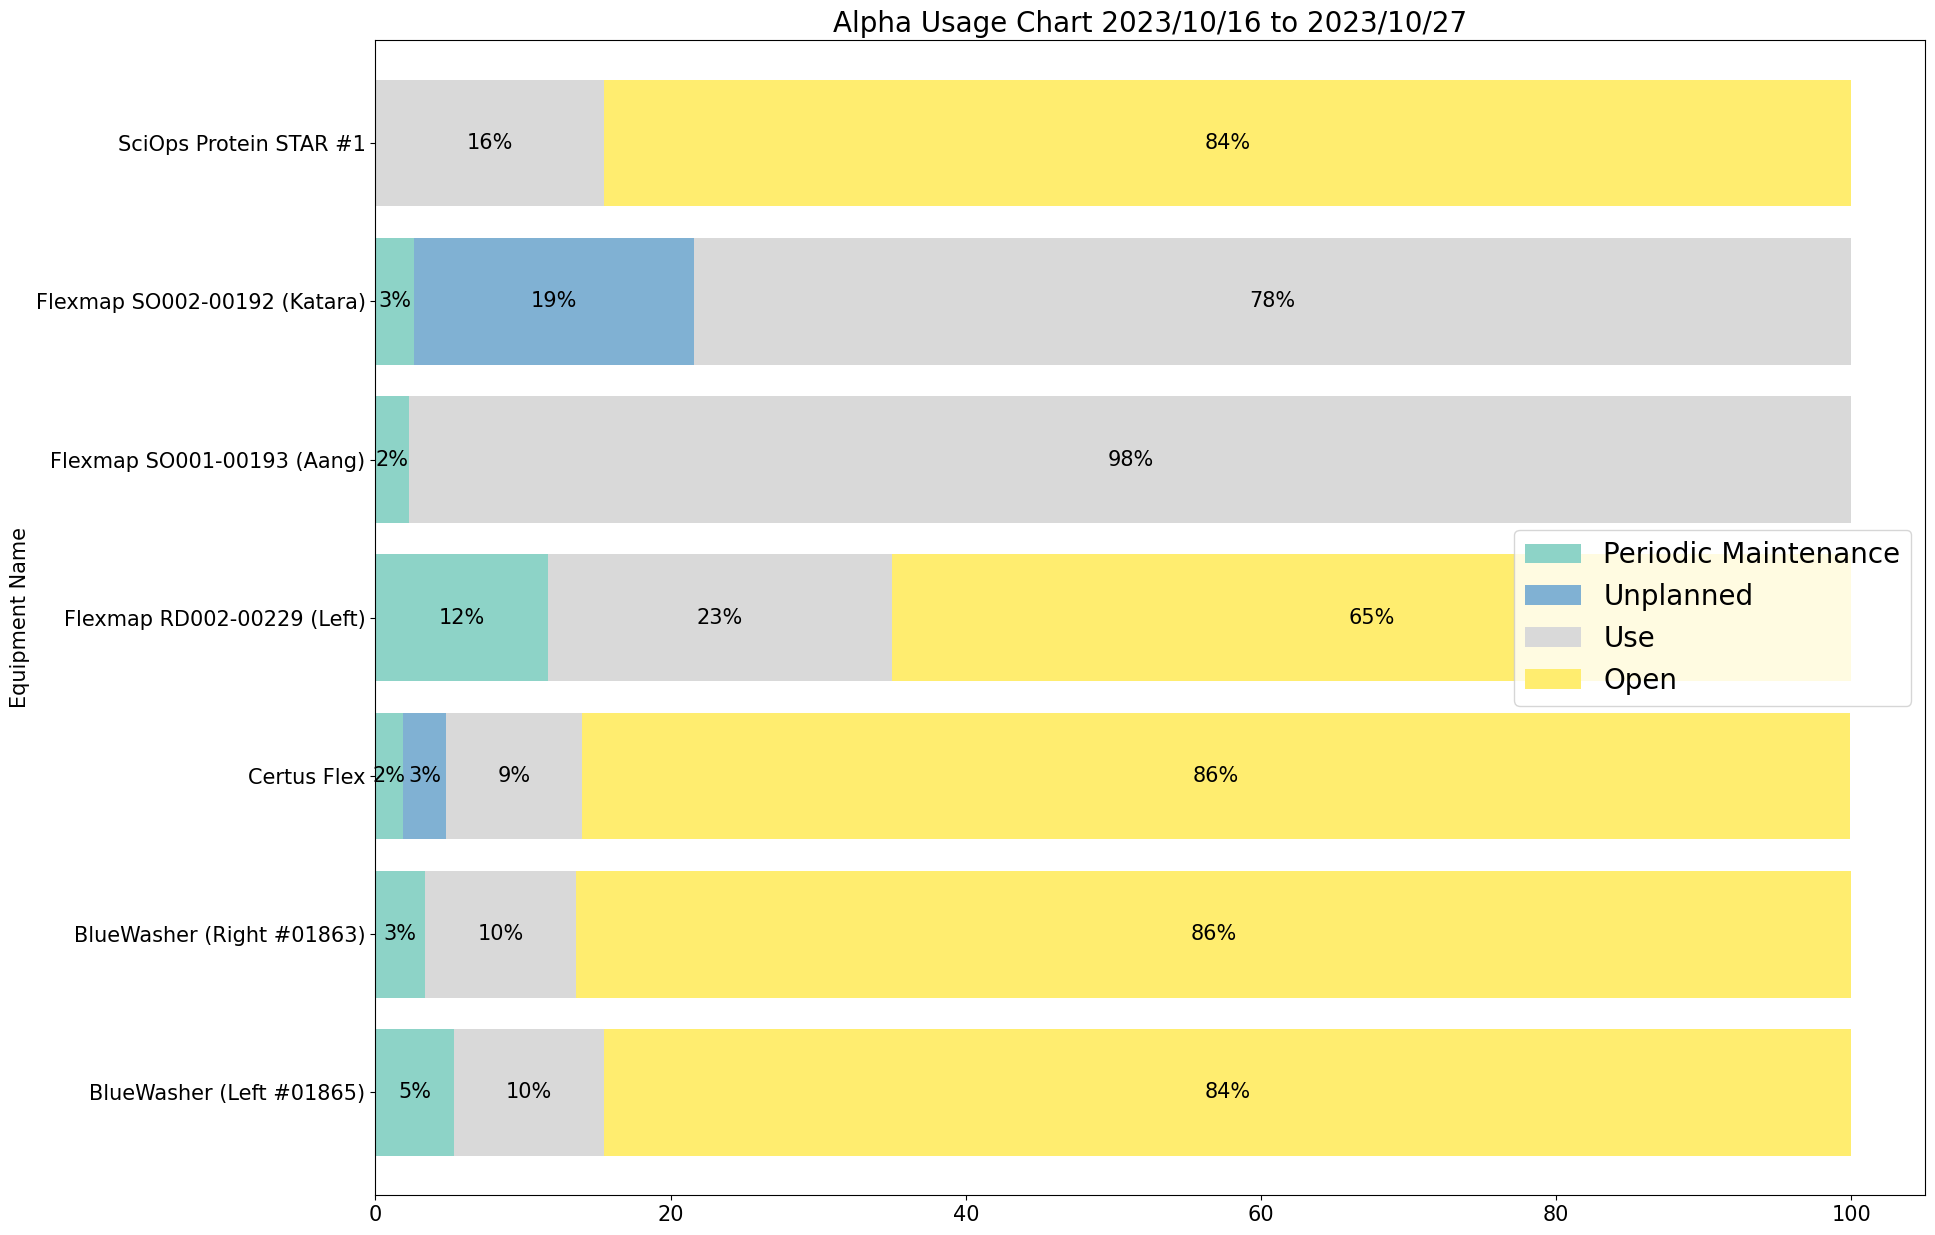

In [31]:


ax = Clustermarket_Proteomics_Time.plot.barh(stacked = True,
                                figsize=(20,15),
                                width=0.8, 
                                colormap='Set3',
                                fontsize=15,
                                align='center')

#Labeling x y axis
ax.set_ylabel('Equipment Name',fontsize=15)
ax.set_xlabel('',fontsize=15)
plt.title(f"Alpha Usage Chart {Alpha_min_time} to {Alpha_max_time}",fontsize=20)

#Renaming y axis ticks
ax.set_yticklabels(Proteomics_equipment)

#Renaming the Legend
ax.legend(fontsize=20,loc='center right')

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='center',fontsize=15)

ax.figure.savefig('Vallania/2023 Data Plots/Salesforce_01_Stacked_Deviation_Bar_Graph.png')
